In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
import os
import glob

In [4]:
import pandas as pd
from tqdm.notebook import tqdm
from scipy import interpolate

In [5]:
movie_info = np.load("../preprocessed_data/clips_png/movie_info.npz", allow_pickle=True)

In [20]:
subj_data_dir = "../preprocessed_data/subj_gaze_pos_upsampled/"
dirs = os.listdir(subj_data_dir)
video_names = sorted([os.path.splitext(os.path.basename(f))[0] for f in dirs])

In [24]:
gaze_path = "../GazeData/NV/"
dirs = os.listdir(gaze_path)
subj_names = sorted([f for f in dirs if os.path.isdir(os.path.join(gaze_path, f))])

In [ ]:
num_subj = len(subj_names)

In [61]:
dist_mat_dict = {}
for v in tqdm(video_names):
    gaze_pos = np.load(f"{subj_data_dir}/{v}.npz", allow_pickle=True)
    dist_mat = np.zeros((num_subj, num_subj))
    for i in range(num_subj):
        for j in range(num_subj):
            if i > j:
                si = subj_names[i]
                sj = subj_names[j]
                if gaze_pos.get(si) is None or gaze_pos.get(sj) is None:
                    dist_mat[i, j] = np.nan
                else:
                    gaze_diff = gaze_pos[si] - gaze_pos[sj]
                    diff_norm = np.linalg.norm(gaze_diff, axis=0)
                    dist_mat[i, j] = np.nanmedian(diff_norm)
    dist_mat_dict[v] = dist_mat + dist_mat.T

  0%|          | 0/200 [00:00<?, ?it/s]

In [72]:
dist_mat_all = []
dist_median_all = []
for v in tqdm(video_names):
    dist_mat = dist_mat_dict[v]
    utril_dist = np.tril(dist_mat)
    utril_dist[utril_dist == 0] = np.nan
    dist_median = np.nanmedian(utril_dist)
    dist_mat_normalized = dist_mat / dist_median
    dist_mat_all.append(dist_mat_normalized)
    dist_median_all.append(dist_median)

  0%|          | 0/200 [00:00<?, ?it/s]

In [73]:
dist_mat_all = np.array(dist_mat_all)
dist_median_all = np.array(dist_median_all)
dist_mat_all_mean = np.nanmean(dist_mat_all, axis=0)

In [81]:
dist_mat_dict["all_nanmean"] = dist_mat_all_mean
dist_mat_dict["dist_nanmedian"] = dist_median_all
dist_mat_dict["video_names"] = video_names

In [82]:
np.savez_compressed("../preprocessed_data/subj2subj_dist.npz", **dist_mat_dict)

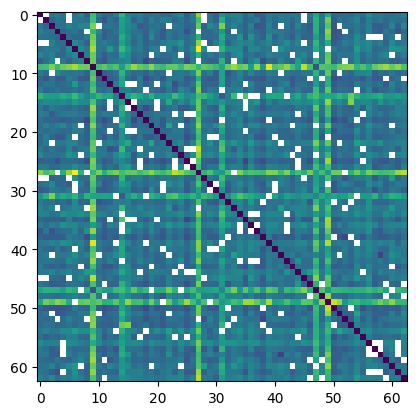

In [77]:
plt.imshow(dist_mat_all_mean)